# CS 3400 Machine Learning - Lab 4: Feedforward Neural Network
## Stuart Harley
### Introduction

Neural Networks are a type of machine learning model that were inspired by the human brain. The networks are are organized into layers and within these layers are neurons. Each neuron implements a linear model whose output is passed thorugh an activation function. A multilayer perceptron is a class of feedforward neural network. In this lab, we will be experimenting with MLP's to classify the iris dataset.

## Reflection Questions

### Problem 1

1. The parameters to the MLPClassifier that we used in this lab are as follows. hidden_layer_sizes : The size (number of neurons) of the hidden layers within the perceptron. max_iter : The maximum number of iterations used during the training of this network. solver : The formula used for weight optimization. In this lab we used 'lbfgs' which is an optimizer in the family of quasi-Newton methods.

2.


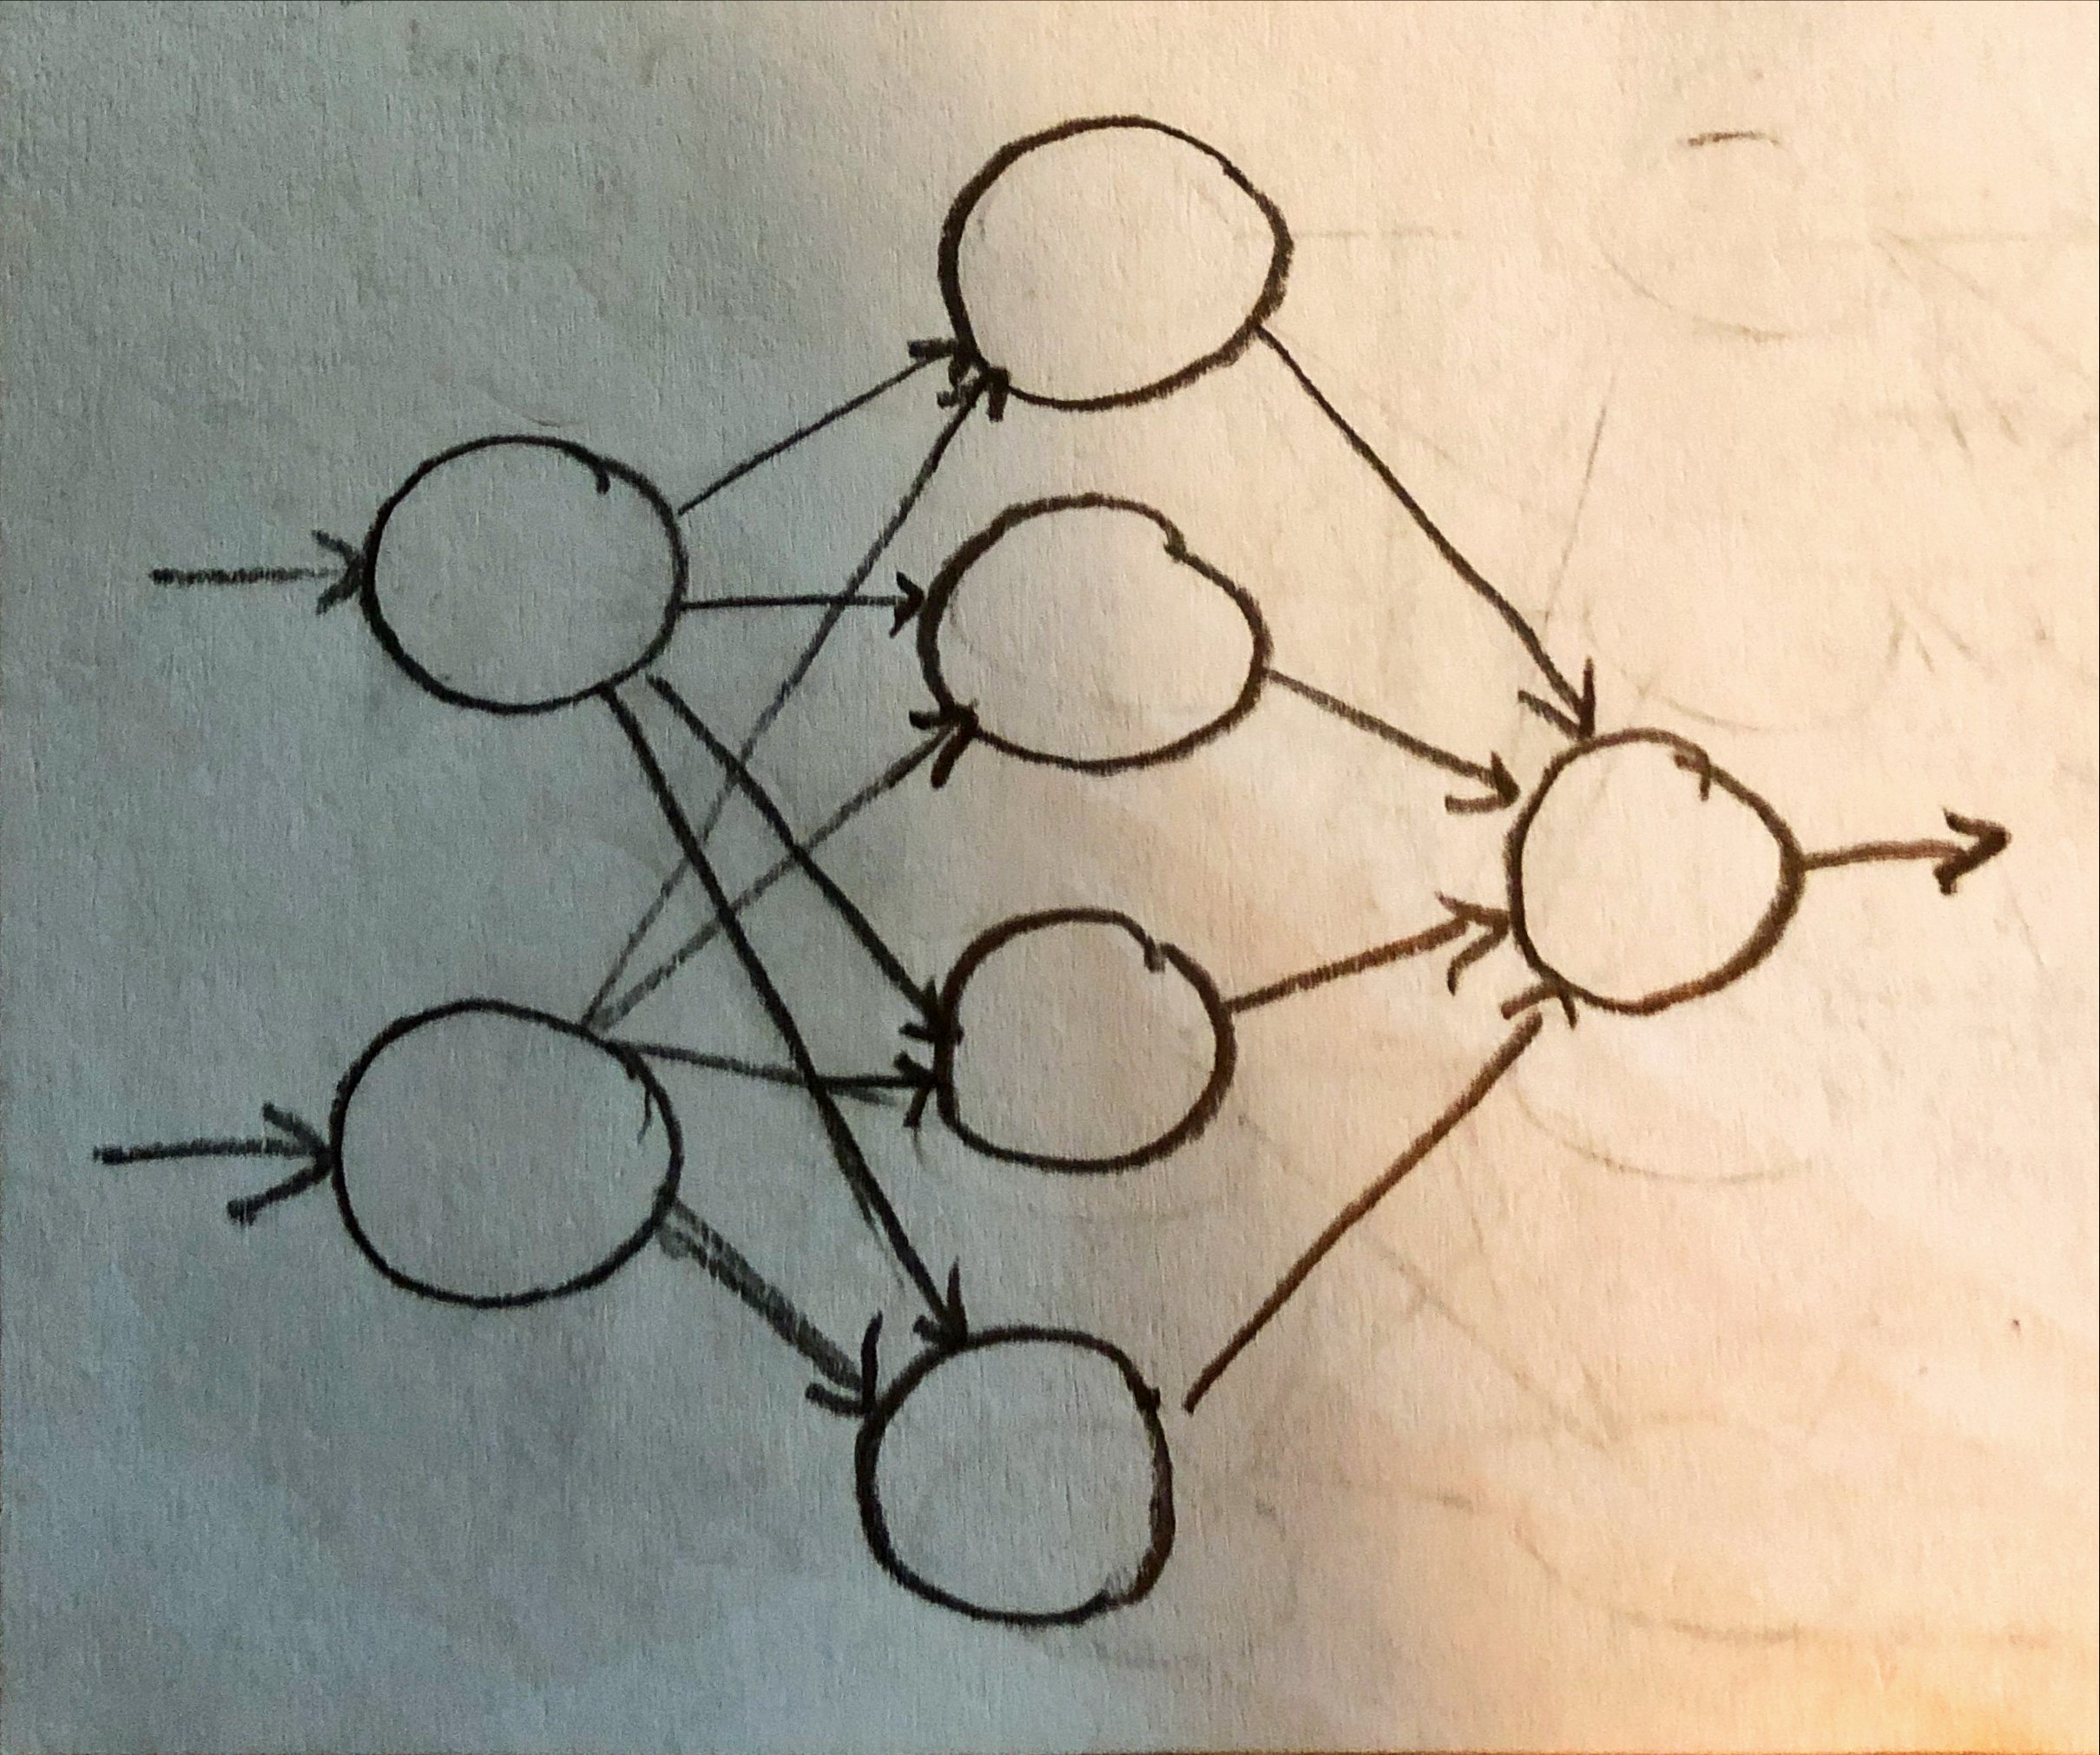

In [1]:
from IPython.display import Image
print('2.')
Image('MLP Drawing.jpeg', width=400, height=400)

3. The activation function used for the nodes is the relu function.

### Problem 2

1. mlp_petals.coefs\[0\] is a 2x4 matrix. mlp_petals.intercepts_\[0\] is a 4x1 vector. These dimensions come from the size of the MLP. There are 2 coefficients (B1 and B2) for each neuron in the hidden layer so it is 2x4. There is 1 intercept for each neuron in the hidden layer so it is 4X1.


2. mlp_petals_models is a 4x3 matrix. The dimensions correspond to combining the previously mentioned matrices. When you stack a 4x2 and a 4x1 matrix, you end up with a 4x3 matrix.


3. Separate Setosa from the rest : Planes 1 or 3 from the petal data.

   Separate Versicolor from the rest : Planes 2 and 3 from the petal data.
   
   Separate Virginica from the rest : Plane 3 from the petal data.

### Problem 3

1. A relu function modifies the output by setting any output < 0 to 0. Any output > 0 stays the same. This impacts the intepretation because anything on one side of the plane by the relu function becomes on the plane.


2. Based on the heatmap plots.

    Separate Setosa from the rest : Neuron 1 and 4
    
    Separate Versicolor from the rest : Neuron 3
    
    Separate Virginica from the rest : Neuron 2


3. The ReLu activation layer makes it easier to use decision boundaries because you don't have to worry about how far on the negative side of the plane the value is, only the positive, because all negative values become 0. However, if you have a point directly on the plane, it could make things more difficult because that 0 value would be the same as some large negative value that has become 0.

### Problem 4

1. The accuracy of the 4 features is 92% while the accuacy of the transformed features is 97.33%. Therefore, the transformed features produced a more accurate model.

### Importing Libraries

In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from neurons import *

### 1)
Loading Iris data set

In [3]:
iris = datasets.load_iris()

Training a Multilayer Perceptron on the petal lengths and widths

In [4]:
scaled_X = StandardScaler().fit_transform(iris.data)
mlp_petals = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, solver='lbfgs')
mlp_petals.fit(scaled_X[:, 2:], iris.target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Creating a second Multilayer Perceptron for the sepal lengths and widths

In [5]:
mlp_sepals = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, solver='lbfgs')
mlp_sepals.fit(scaled_X[:, 0:2], iris.target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### 2)
Extracting the weight vectors for the hidden layers

In [6]:
mlp_petals_models = np.vstack([mlp_petals.intercepts_[0], mlp_petals.coefs_[0]]).T
mlp_sepals_models = np.vstack([mlp_sepals.intercepts_[0], mlp_sepals.coefs_[0]]).T

The equation representing the hidden layers: 0 = B0 + B1\*x1 + B2\*x2 solved for x2 becomes x2 = (-B0 - B1\*x1) / B2

In [7]:
def x2(B0, B1, B2, x1):
    return (-B0 - B1 * x1) / B2

Plotting scaled petal features along with the planes for the 4 hidden layers.

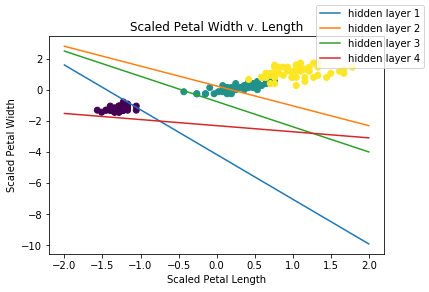

In [8]:
x1 = np.linspace(-2, 2, 100)
fig, axes = plt.subplots()
axes.scatter(scaled_X[:,2], scaled_X[:,3], c=iris.target)
axes.plot(x1, x2(mlp_petals_models[0,0], mlp_petals_models[0,1], mlp_petals_models[0,2], x1), label='hidden layer 1')
axes.plot(x1, x2(mlp_petals_models[1,0], mlp_petals_models[1,1], mlp_petals_models[1,2], x1), label='hidden layer 2')
axes.plot(x1, x2(mlp_petals_models[2,0], mlp_petals_models[2,1], mlp_petals_models[2,2], x1), label='hidden layer 3')
axes.plot(x1, x2(mlp_petals_models[3,0], mlp_petals_models[3,1], mlp_petals_models[3,2], x1), label='hidden layer 4')
axes.set_xlabel('Scaled Petal Length')
axes.set_ylabel('Scaled Petal Width')
axes.set_title('Scaled Petal Width v. Length')
fig.legend();

Plotting scaled sepal features along with the planes for the 4 hidden layers.

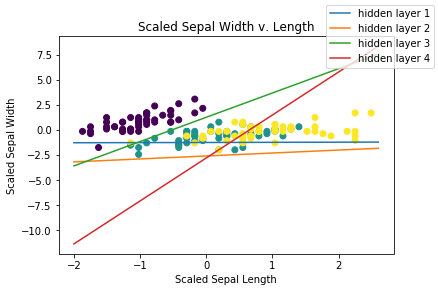

In [9]:
x1 = np.linspace(-2, 2.6, 100)
fig, axes = plt.subplots()
axes.scatter(scaled_X[:,0], scaled_X[:,1], c=iris.target)
axes.plot(x1, x2(mlp_sepals_models[0,0], mlp_sepals_models[0,1], mlp_sepals_models[0,2], x1), label='hidden layer 1')
axes.plot(x1, x2(mlp_sepals_models[1,0], mlp_sepals_models[1,1], mlp_sepals_models[1,2], x1), label='hidden layer 2')
axes.plot(x1, x2(mlp_sepals_models[2,0], mlp_sepals_models[2,1], mlp_sepals_models[2,2], x1), label='hidden layer 3')
axes.plot(x1, x2(mlp_sepals_models[3,0], mlp_sepals_models[3,1], mlp_sepals_models[3,2], x1), label='hidden layer 4')
axes.set_xlabel('Scaled Sepal Length')
axes.set_ylabel('Scaled Sepal Width')
axes.set_title('Scaled Sepal Width v. Length')
fig.legend();

### 3)

Creating a mesh grid from (-2, 2) and plotting it as a scatter plot

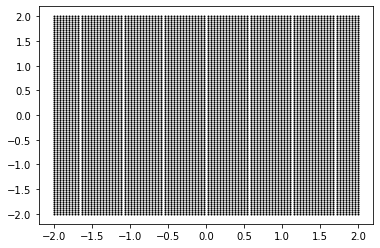

In [10]:
x = np.linspace(-2, 2, 100)
xv, yv = np.meshgrid(x, x)
plt.scatter(xv, yv, s=1, c='k');

Using the Input and Neuron classes from neruons.py to calculate the value for the first hidden layer neuron at each grid point (X).

In [11]:
X = np.hstack([xv.reshape(-1, 1), yv.reshape(-1, 1)])
input = Input()
p_layer = Neuron([input], mlp_petals_models[0, :])
pred = p_layer.predict(X)

Plotting the model outputs as a heatmap.

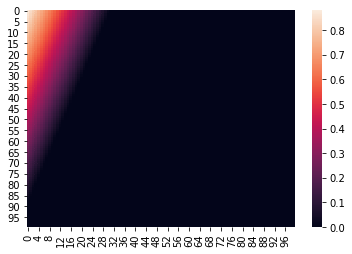

In [12]:
pred = pred.reshape(100, 100)
heatmap = sns.heatmap(pred)

Repeating for the 3 remaining neurons in the hidden layer.

Second Neuron.

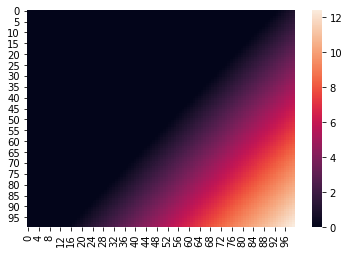

In [13]:
X = np.hstack([xv.reshape(-1, 1), yv.reshape(-1, 1)])
input = Input()
p_layer = Neuron([input], mlp_petals_models[1, :])
pred = p_layer.predict(X).reshape(100,100)
heatmap = sns.heatmap(pred)

Third Neuron

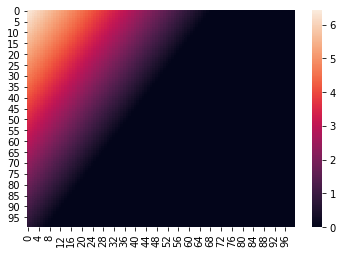

In [14]:
X = np.hstack([xv.reshape(-1, 1), yv.reshape(-1, 1)])
input = Input()
p_layer = Neuron([input], mlp_petals_models[2, :])
pred = p_layer.predict(X).reshape(100, 100)
heatmap = sns.heatmap(pred)

Fourth Neuron

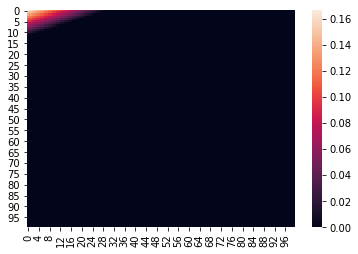

In [15]:
X = np.hstack([xv.reshape(-1, 1), yv.reshape(-1, 1)])
input = Input()
p_layer = Neuron([input], mlp_petals_models[3, :])
pred = p_layer.predict(X).reshape(100, 100)
heatmap = sns.heatmap(pred)

Repeating for the hidden layers of the Sepals model

First Neuron

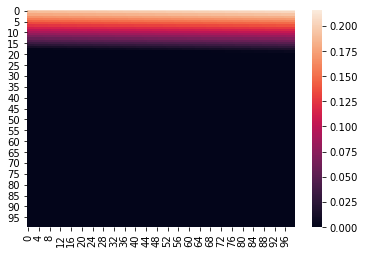

In [16]:
X = np.hstack([xv.reshape(-1, 1), yv.reshape(-1, 1)])
input = Input()
p_layer = Neuron([input], mlp_sepals_models[0, :])
pred = p_layer.predict(X).reshape(100, 100)
heatmap = sns.heatmap(pred)

Second Neuron

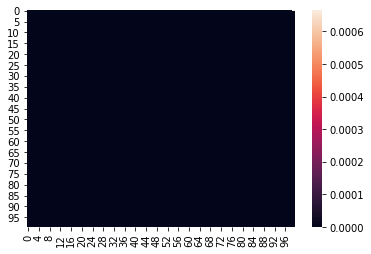

In [17]:
X = np.hstack([xv.reshape(-1, 1), yv.reshape(-1, 1)])
input = Input()
p_layer = Neuron([input], mlp_sepals_models[1, :])
pred = p_layer.predict(X).reshape(100, 100)
heatmap = sns.heatmap(pred)

Third Neuron

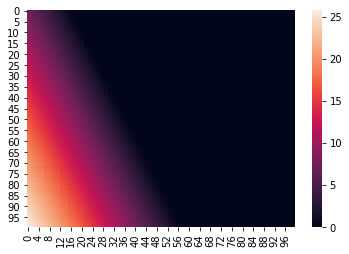

In [18]:
X = np.hstack([xv.reshape(-1, 1), yv.reshape(-1, 1)])
input = Input()
p_layer = Neuron([input], mlp_sepals_models[2, :])
pred = p_layer.predict(X).reshape(100, 100)
heatmap = sns.heatmap(pred)

Fourth Neuron

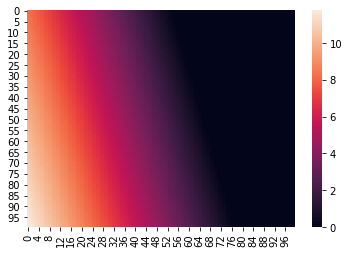

In [19]:
X = np.hstack([xv.reshape(-1, 1), yv.reshape(-1, 1)])
input = Input()
p_layer = Neuron([input], mlp_sepals_models[3, :])
pred = p_layer.predict(X).reshape(100, 100)
heatmap = sns.heatmap(pred)

### 4)

Using the Input, Neuron, and HStack classes with the weights from the MLP model to recreate the hidden layer.

In [20]:
input = Input()
p_layer_1 = Neuron([input], mlp_petals_models[0, :])
p_layer_2 = Neuron([input], mlp_petals_models[1, :])
p_layer_3 = Neuron([input], mlp_petals_models[2, :])
p_layer_4 = Neuron([input], mlp_petals_models[3, :])
stacked = HStack([p_layer_1, p_layer_2, p_layer_3, p_layer_4])

Predicting the transformed values to create a transformed feature matrix.

In [21]:
transformed_petals_X = stacked.predict(scaled_X[:, 2:])

Repeating for the sepal MLP model

In [22]:
input = Input()
p_layer_1 = Neuron([input], mlp_petals_models[0, :])
p_layer_2 = Neuron([input], mlp_petals_models[1, :])
p_layer_3 = Neuron([input], mlp_petals_models[2, :])
p_layer_4 = Neuron([input], mlp_petals_models[3, :])
stacked = HStack([p_layer_1, p_layer_2, p_layer_3, p_layer_4])
transformed_sepals_X = stacked.predict(scaled_X[:, 0:2])

Combining the two transformed feature matrices into a new feature matrix with 8 columns.

In [23]:
transformed_stacked = np.hstack((transformed_petals_X, transformed_sepals_X))

Training two logistic regression models. One on the original 4 features and one on the new transformed feature matrix with 8 columns.

In [24]:
four_feat = SGDClassifier(loss='log')
four_feat.fit(scaled_X, iris.target)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
eight_feat = SGDClassifier(loss='log')
eight_feat.fit(transformed_stacked, iris.target)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Evaluating the two models using accuracy and confusion matrices.

In [26]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix',
                          cmap=None, normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}'.format(accuracy))
    plt.show()

In [27]:
four_confusion = confusion_matrix(iris.target, four_feat.predict(scaled_X))
eight_confusion = confusion_matrix(iris.target, eight_feat.predict(transformed_stacked))

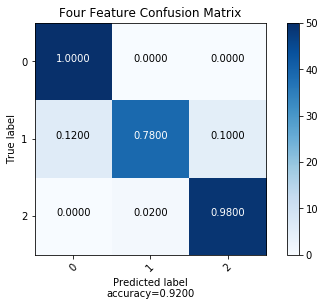

In [28]:
plot_confusion_matrix(four_confusion, [0, 1, 2], title='Four Feature Confusion Matrix')

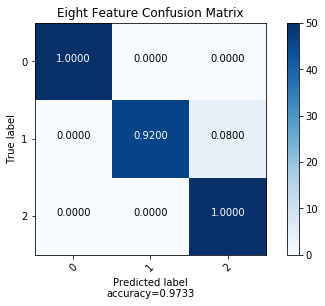

In [29]:
plot_confusion_matrix(eight_confusion, [0, 1, 2], title='Eight Feature Confusion Matrix')